In [1]:

import pandas as pd
from pandas import Series,DataFrame

import seaborn as sns
df = pd.read_csv('train.csv')




In [2]:
##creating the dataframe
df=DataFrame(pd.read_csv('train.csv'))

In [3]:
##locating columns with null values
##located nulls in "Age","Cabin" & "Embarked"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
##checking column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
##pulling attribute aggregate data
df.Age.describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [7]:
##count of null values in Age
df.Age.isnull().sum()

177

In [8]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

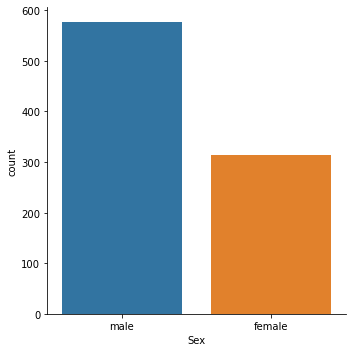

In [10]:
###male vs female passengers
sns.catplot(x='Sex',data=df,kind='count')

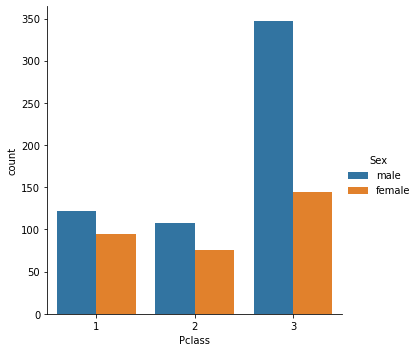

In [11]:
##further refining by sex and passenger class
sns.catplot(x='Pclass',data=df,hue='Sex',kind='count')

In [12]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
##defining a function to seperate children from adults while retaining the sex of adult passengers

def m_f_child(passenger):
    age,sex=passenger
    if age<16:
        return'Child'
    else:
        return sex

##adding the 'Person column to the df to hold man,woman or child data    
df['Person']=df[['Age','Sex']].apply(m_f_child,axis=1)

In [14]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


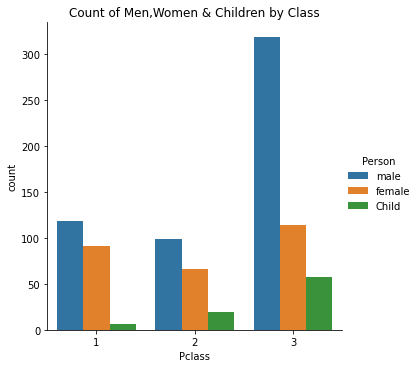

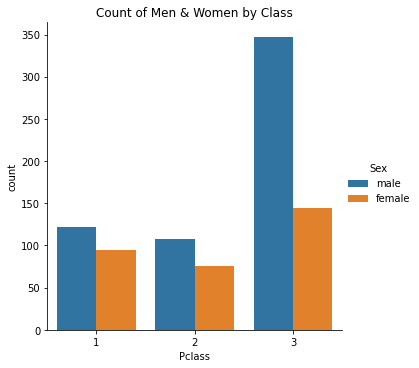

In [15]:
fig1=sns.catplot(x='Pclass',data=df,hue='Person',kind='count')
fig2=sns.catplot(x='Pclass',data=df,hue='Sex',kind='count')

fig1.set(title='Count of Men,Women & Children by Class')
fig2.set(title='Count of Men & Women by Class')



[Text(0.5, 1.0, 'Passenger Age distribution')]

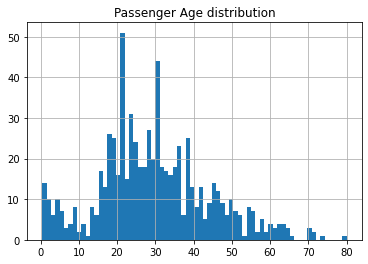

In [16]:
##distribution of age of passengers
fig1=df['Age'].hist(bins=70)
fig1.set(title='Passenger Age distribution')

In [17]:
df.Person.value_counts()

male      537
female    271
Child      83
Name: Person, dtype: int64

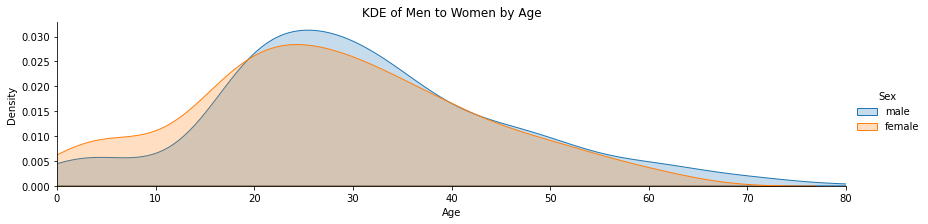

In [18]:
##creating KDE for men and women
fig=sns.FacetGrid(data=df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

##finding the oldest passenger to set limits
oldest=df.Age.max()

fig.set(xlim=(0,oldest))
fig.add_legend()
fig.set(title='KDE of Men to Women by Age')

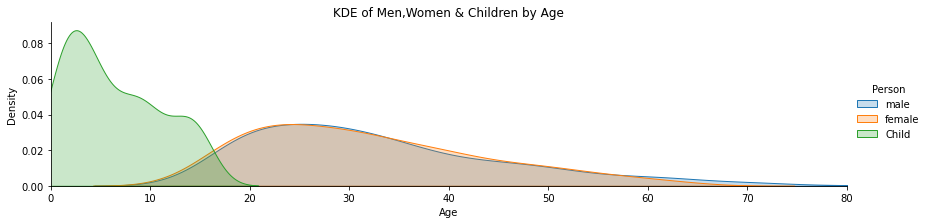

In [19]:
##adding children to thr previous graph
fig=sns.FacetGrid(data=df,hue='Person',aspect=4,)
fig.map(sns.kdeplot,'Age',shade=True,)

##finding the oldest passenger to set limits
oldest=df.Age.max()

fig.set(xlim=(0,oldest))
fig.add_legend()
fig.set(title='KDE of Men,Women & Children by Age')

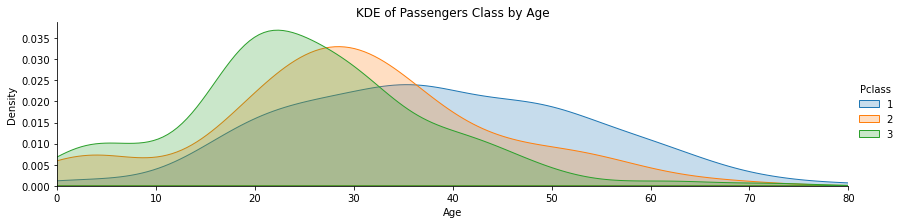

In [20]:
##creating KDE of passengers by class by age
fig=sns.FacetGrid(data=df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

##finding the oldest passenger to set limits
oldest=df.Age.max()

fig.set(xlim=(0,oldest))
fig.add_legend()
fig.set(title='KDE of Passengers Class by Age')

In [21]:
##identified 687 out of 891 entries for Cabin as null
print(df.Cabin.info())
print(df.Cabin.isnull().sum())

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
204 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB
None
687


In [22]:
##creatin deck variable to pull the deck level from the Cabin info
deck=df.Cabin.dropna()
print(deck.head(20))

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
54            B30
55            C52
61            B28
62            C83
66            F33
75          F G73
88    C23 C25 C27
92            E31
96             A5
97        D10 D12
Name: Cabin, dtype: object


In [23]:
##no longer any entries with null values
deck.info()

<class 'pandas.core.series.Series'>
Int64Index: 204 entries, 1 to 889
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
204 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [24]:
deck.head(25)

1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
Name: Cabin, dtype: object

In [25]:
##pulling the deck level from Cabin
levels=[]

for level in deck:
    levels.append(level[0])

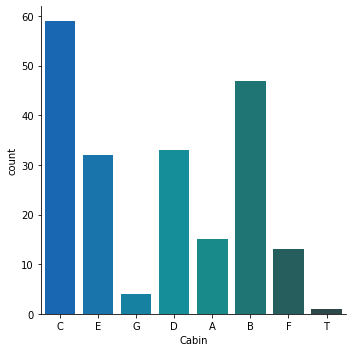

In [26]:
cab_df = DataFrame(levels)
cab_df.columns=['Cabin']
sns.catplot(x='Cabin',data=cab_df,palette='winter_d',kind='count')

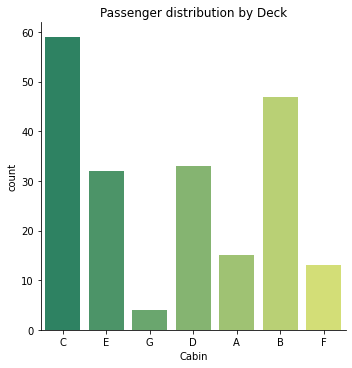

In [51]:
##Dropped the 'T' deck from the variable
cab_df=cab_df[cab_df.Cabin !='T']
fig0=sns.catplot(x='Cabin',data=cab_df,palette='summer',kind='count')
fig0.set(title='Passenger distribution by Deck')

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male


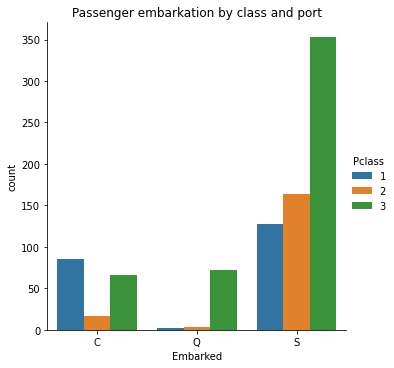

In [52]:
fig1=sns.catplot(x='Embarked',data=df,hue='Pclass',kind='count',order=['C','Q','S'])
fig1.set(title='Passenger embarkation by class and port')

In [30]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male


In [31]:
##finding passengers traveling alone
df['Alone']=df.Parch + df.SibSp
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,0


In [32]:
df.loc[df["Alone"] == 0, "Alone"] = 'Alone'

In [33]:
df.loc[df['Alone']!= 'Alone','Alone']='With Family'

In [34]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,With Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone


Text(0.5, 6.79999999999999, 'Traveling Arrangements')

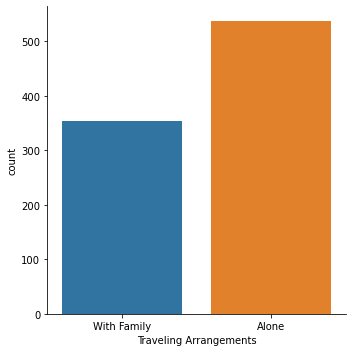

In [35]:
sns.catplot(x='Alone',data=df,kind='count')
plt.xlabel('Traveling Arrangements')

In [36]:
df['Survivor']=df.Survived.map({0:'No',1:'Yes'})


In [37]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone,No
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone,Yes
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,With Family,No
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone,Yes


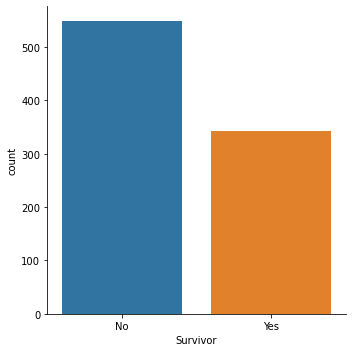

In [38]:
sns.catplot(x='Survivor',data=df,kind='count')

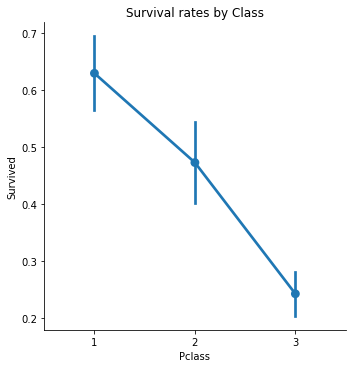

In [39]:
##survival rate by Class
fig=sns.catplot(x='Pclass',y='Survived',data=df,kind='point')
fig.set(title='Survival rates by Class')

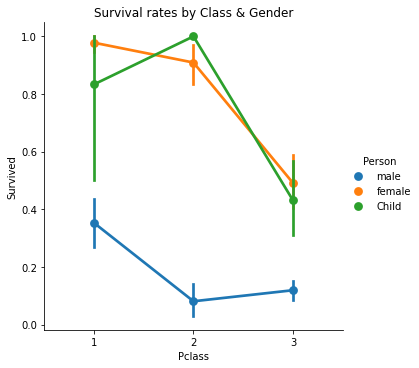

In [40]:
fig=sns.catplot(x='Pclass',y='Survived',hue='Person',data=df,kind='point')
fig.set(title='Survival rates by Class & Gender')

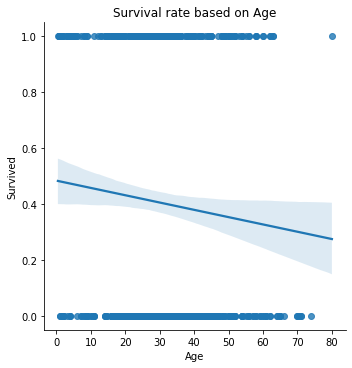

In [41]:
#sns.lmplot(x='Age',y='Survived',data=df)
fig=sns.lmplot(x='Age',y='Survived',data=df)
fig.set(title='Survival rate based on Age')

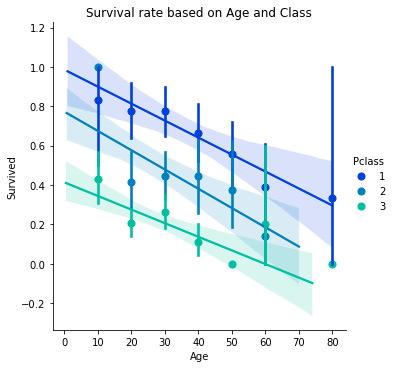

In [42]:
gen=[10,20,30,40,50,60,80]
fig1=sns.lmplot(x='Age',y='Survived',hue='Pclass',palette='winter',data=df,x_bins=gen)
fig1.set(title='Survival rate based on Age and Class')

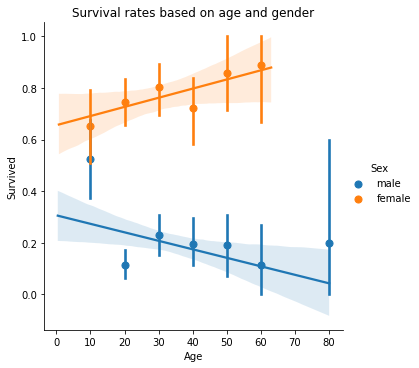

In [43]:
fig3=sns.lmplot(x='Age',y="Survived",data=df,hue='Sex',x_bins=gen)
fig3.set(title='Survival rates based on age and gender')

In [44]:
##joining the deck variable to the dataframe as Deck
df['Deck']=cab_df
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone,No,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone,Yes,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,With Family,No,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone,Yes,NaN


C:\Users\joemc\anaconda3\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


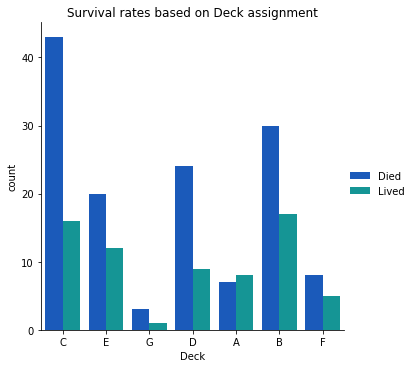

In [45]:
my_labels=['Died','Lived']
fig4=sns.catplot(x='Deck',hue='Survived',data=df,palette='winter',kind='count',legend=False)
fig4.add_legend(labels=my_labels)
fig4.set(title='Survival rates based on Deck assignment')

In [46]:

df['Survivor'].value_counts()

No     549
Yes    342
Name: Survivor, dtype: int64

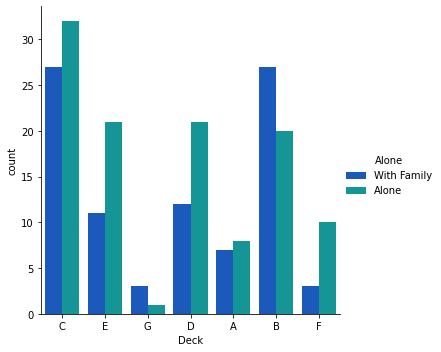

In [47]:
fig5=sns.catplot(x='Deck',hue='Alone',data=df,palette='winter',kind='count')

In [67]:
alive=DataFrame(df.loc[(df.Survivor=='Yes'),['Survivor','Alone','Survived']])

In [69]:
alive

,Survivor,Alone,Survived
1,Yes,With Family,1
2,Yes,Alone,1
3,Yes,With Family,1
8,Yes,With Family,1
9,Yes,With Family,1
...,...,...,...
875,Yes,Alone,1
879,Yes,With Family,1
880,Yes,With Family,1
887,Yes,Alone,1


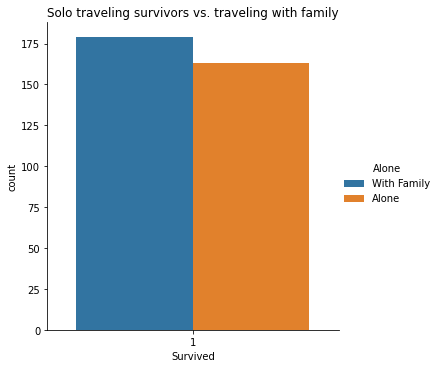

In [77]:
fig9=sns.catplot(x='Survived',data=alive,hue='Alone',kind='count')
fig9.set(title='Solo traveling survivors vs. traveling with family')

In [76]:
alive.Survived.sum()

342